<div align="center" style="color: ORANGE; font-size: 24px; font-weight: bold;">
    DATA PROJECT
</div>


In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/result/calendar_data.csv
/kaggle/input/result/deposit_data.csv
/kaggle/input/result/client_data.csv


# Exploratory Data Analysis

In [11]:
import pandas as pd

In [21]:
calendar_data = pd.read_csv("/kaggle/input/result/calendar_data.csv")
print("calendar data shape", calendar_data.shape)
display(calendar_data.head())
client_data = pd.read_csv("/kaggle/input/result/client_data.csv")
print("client data shape", client_data.shape)
display(client_data.head())
deposit_data = pd.read_csv("/kaggle/input/result/deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
display(deposit_data.head())


calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


<div align="left" style="color: Green; font-size: 14px; font-weight: bold;">
    TO-DO:
</div>
we have three table so we have to merge them in one Dataframe

In [22]:
merged_data = client_data.merge(deposit_data, on="client_id")
merged_data = merged_data.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

In [23]:
merged_data

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,2019-10-06,Month 5


In [24]:
merged_data.drop(columns=["gregorian_date"], inplace=True)
merged_data

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5


In [25]:
merged_data["client_geographical_region"].value_counts()

client_geographical_region
West         205629
South        108004
Midwest       88185
Northeast     78576
Name: count, dtype: int64

In [26]:
merged_data["client_residence_status"].value_counts()

client_residence_status
Own     345432
Rent    134962
Name: count, dtype: int64

In [27]:
merged_data["client_age"].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

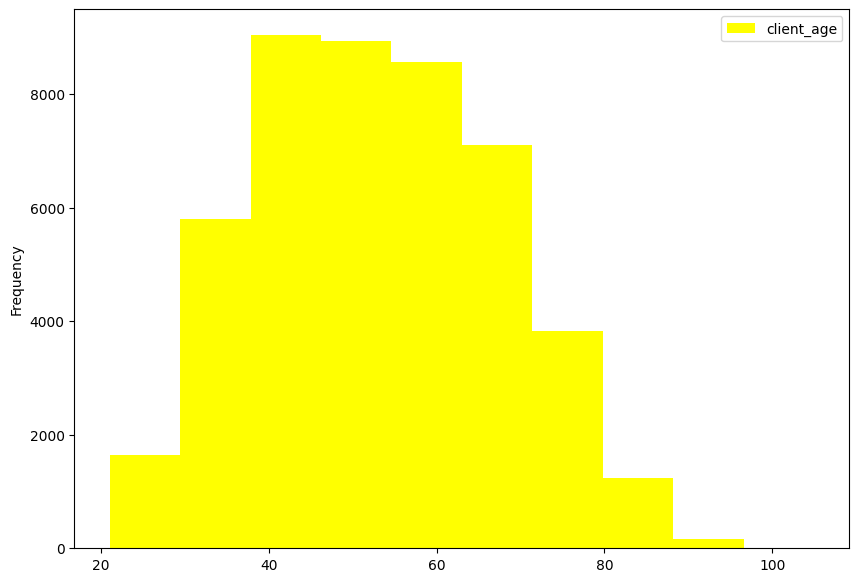

In [28]:
_ = client_data[["client_age"]].plot(kind="hist",color="yellow")

In [30]:
calendar_data["month_name"].value_counts()

month_name
Month 2    31
Month 5    31
Month 3    31
Month 1    30
Month 4    30
Name: count, dtype: int64

In [31]:
merged_data["deposit_date"].min(), merged_data["deposit_date"].max()

('2019-06-01', '2019-10-31')

In [32]:
merged_data["deposit_type"].value_counts()

deposit_type
Scheduled Deposit    247986
Actual Deposit       232408
Name: count, dtype: int64

In [33]:
merged_data["deposit_cadence"].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

In [34]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


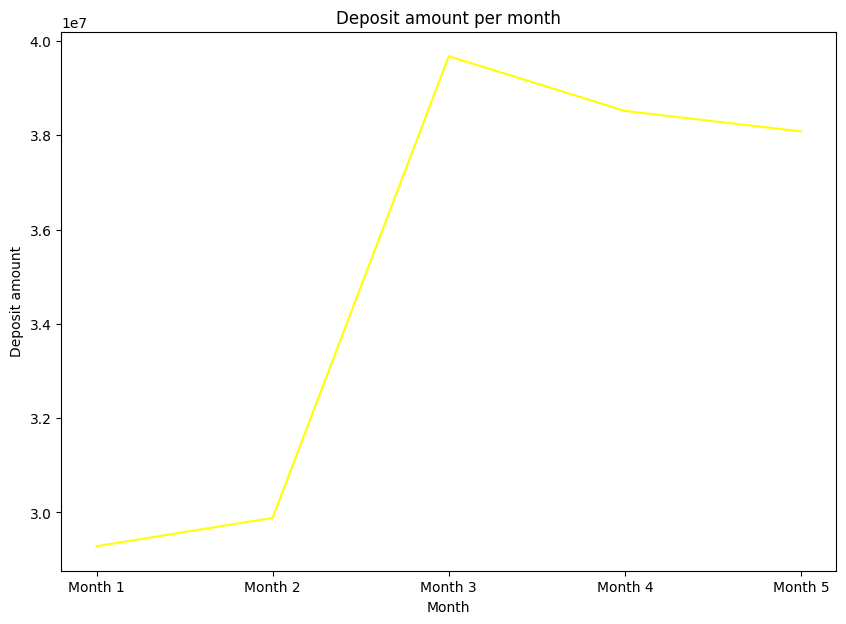

In [37]:
deposit_amount_by_month = merged_data.groupby(by=merged_data["month_name"])["deposit_amount"].sum()

print(deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month,color='yellow')
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

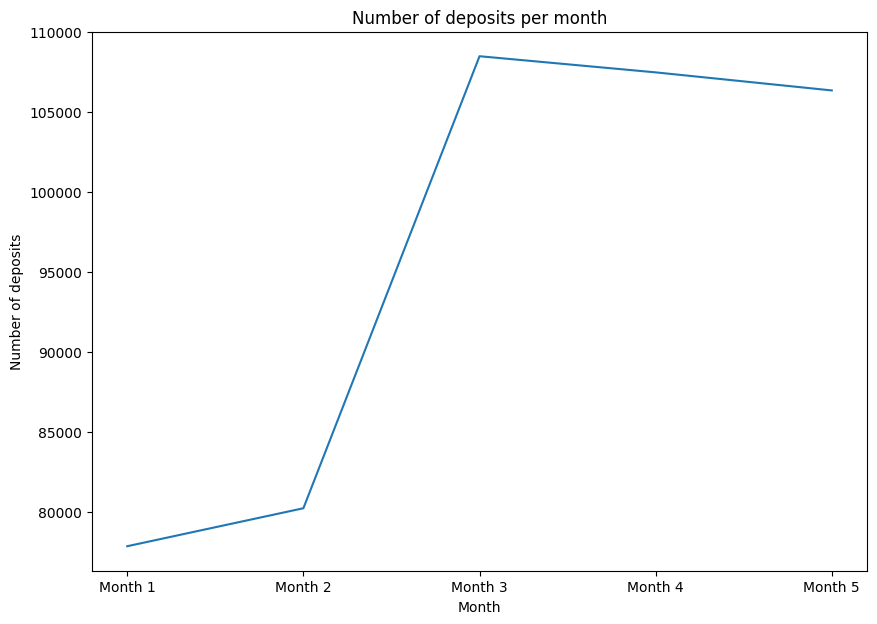

In [38]:
number_of_deposits_by_month = merged_data.groupby(by=merged_data["month_name"]).size()

_ = plt.plot(number_of_deposits_by_month)

_ = plt.title("Number of deposits per month")
_ = plt.ylabel("Number of deposits")
_ = plt.xlabel("Month")

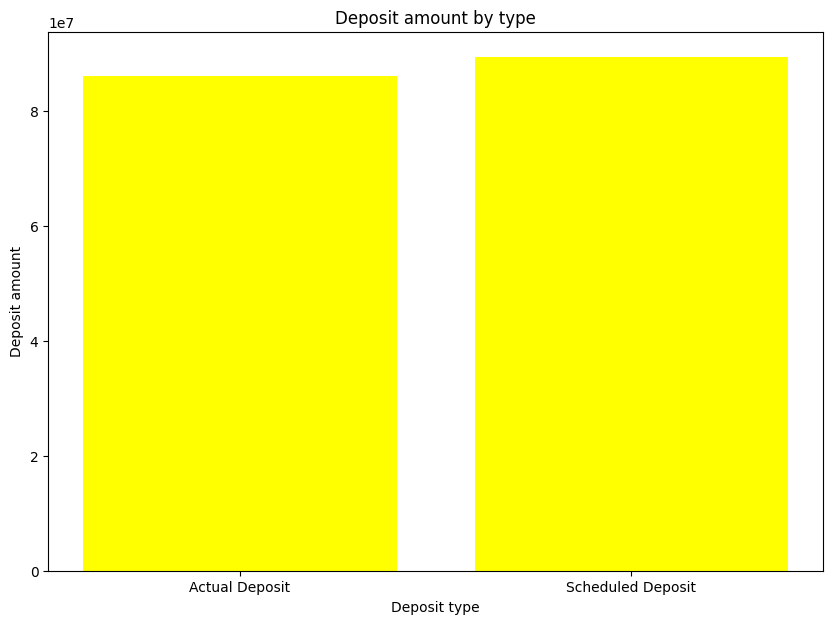

In [39]:
deposit_amount_by_type = merged_data.groupby(by=merged_data["deposit_type"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type,color ='yellow')

_ = plt.title("Deposit amount by type")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit type")

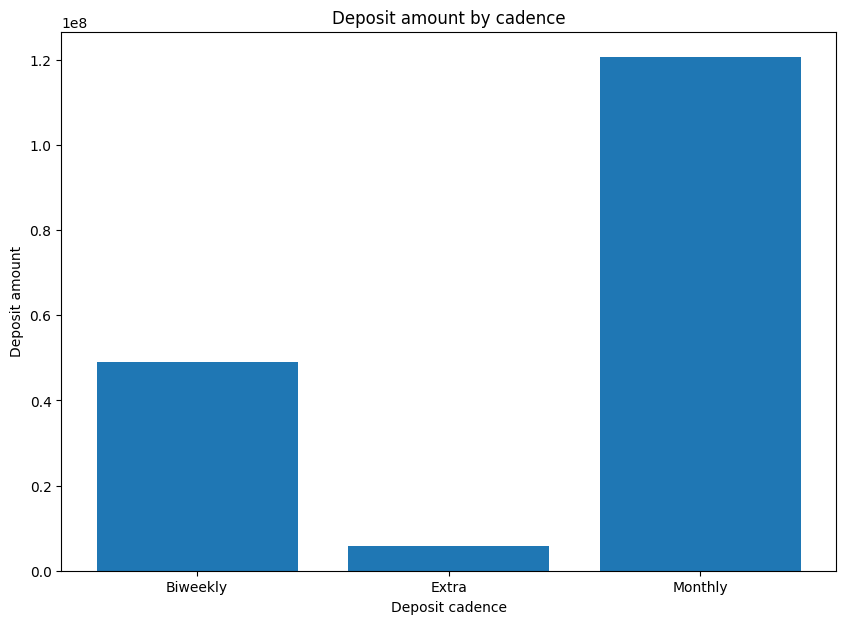

In [40]:
deposit_amount_by_cadence = merged_data.groupby(by=merged_data["deposit_cadence"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)

_ = plt.title("Deposit amount by cadence")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit cadence")

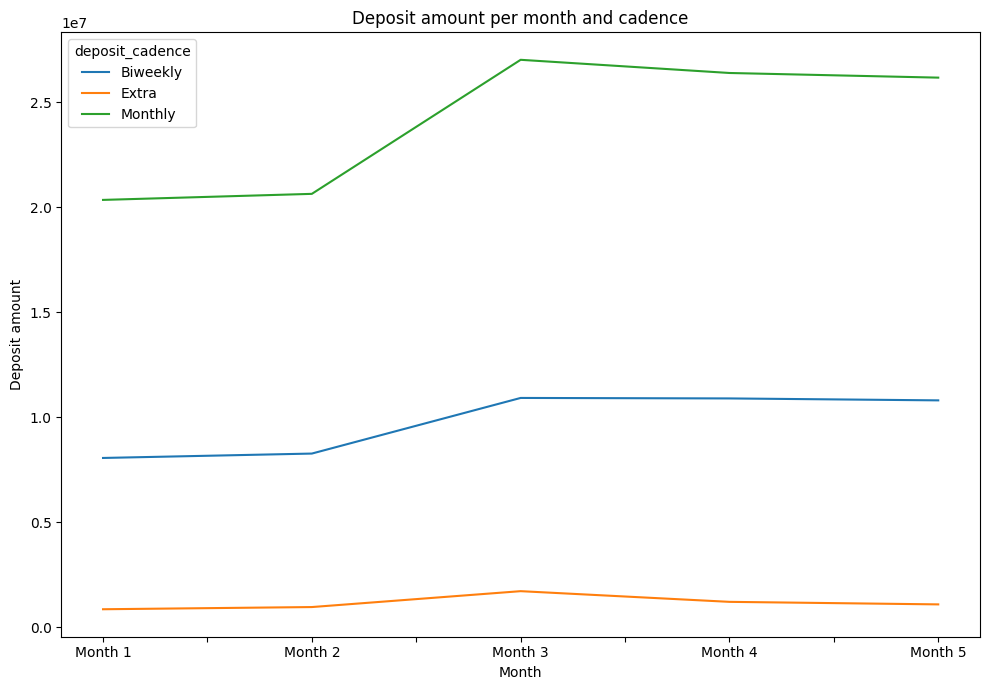

In [41]:
tmp_df = merged_data.groupby(by=[merged_data["deposit_cadence"], merged_data["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

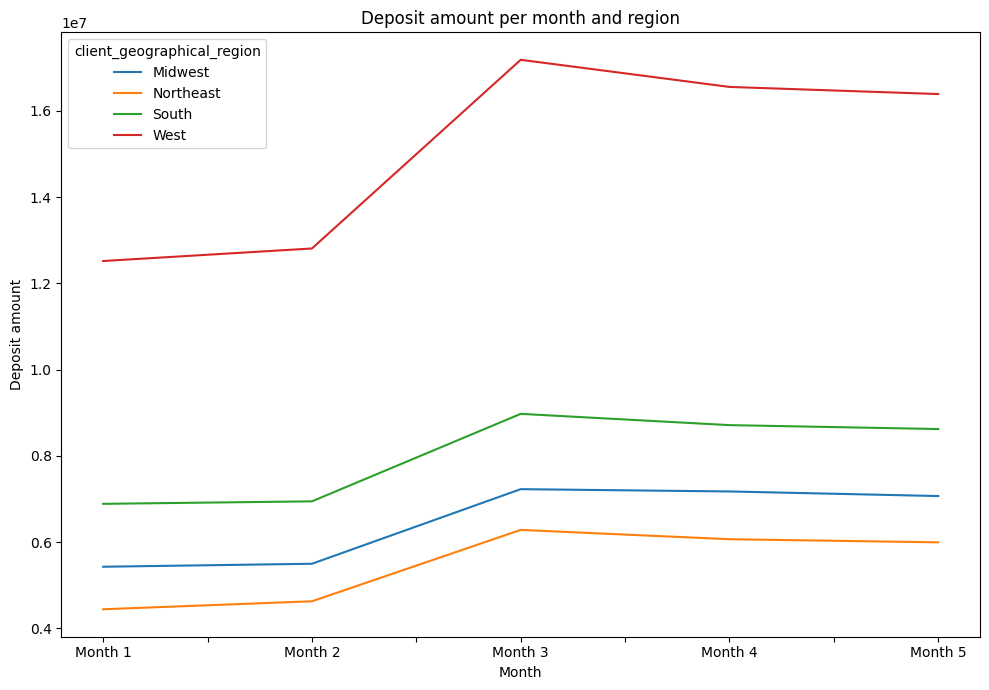

In [42]:
tmp_df = merged_data.groupby(by=[merged_data["client_geographical_region"], merged_data["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

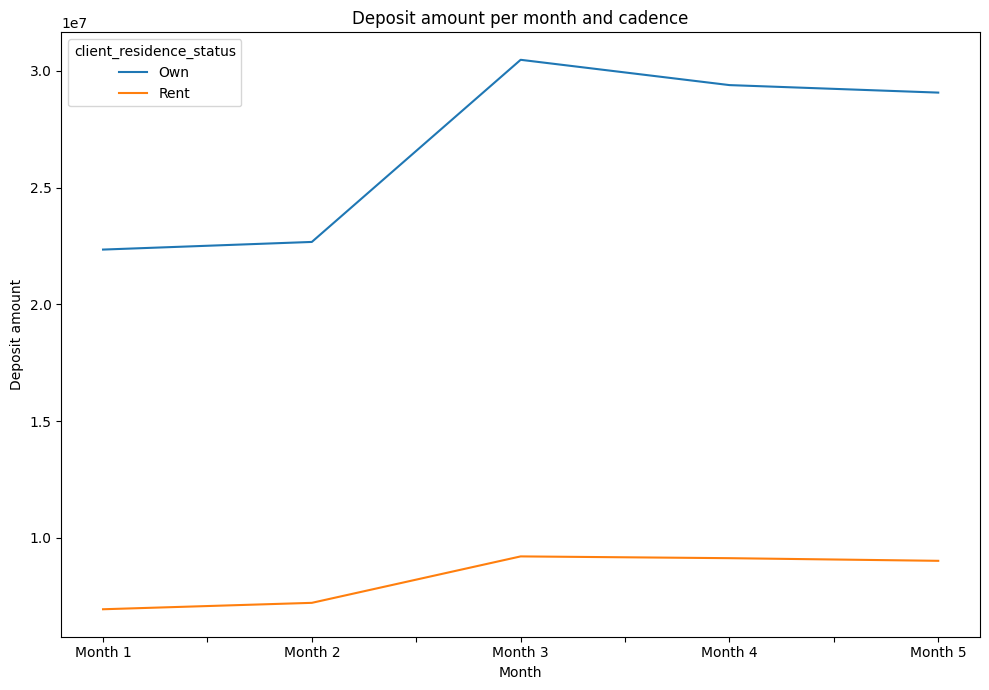

In [44]:
tmp_df = merged_data.groupby(by=[merged_data["client_residence_status"], merged_data["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

<div align="left" style="color: Green; font-size: 14px; font-weight: bold;">
    TO-DO:
</div>

### Let's investigate the metrics that will impact our campaign  
**How and why did I choose my specific success metric(s)?**  

---

<div align="left" style="color: Purple; font-size: 14px; font-weight: bold;">
    What I found:
</div>

This question can already be answered from the plots in the previous sections, especially the ones that show the **deposit amount per month**.  

We know that the ad campaign was running during the **3rd month** of our data set (**Month 8 = August**). A **huge spike** can be noticed in the line plot titled *"Deposit amount per month"* between **Months 7 & 8**, i.e., while the campaign was running.  

Since then, the deposit amount has **slowly decreased** but has remained at **significantly higher levels** than before the campaign.  

#### Key Insights:
- **During the campaign month:**  
  - Freedom Debt Relief received **an increase of nearly $10 million** in deposit amounts compared to previous months.  
- **In the months following the campaign:**  
  - Deposit amounts started to **gradually decline** but remained above pre-campaign levels.  
  - **$8.5 million** increase in the month immediately following the campaign.  
  - **$8 million** increase in the last recorded month of the data.  

#### Cost vs. Profitability:
- **Campaign Cost:** $5 million  
- **Total increase in deposit amount:** $26.5 million  
- **Estimated fee (18% minimum):**  
  - **$4.77 million profit** ($26.5M * 18%)  
  - At first glance, this suggests a **loss of $230K** for the campaign.  

#### Important Considerations:
- The **trend suggests a stronger long-term impact** beyond this estimation.  
- It is **unlikely** that all clients were charged the **minimum 18% fee**, meaning actual profits could be higher.  
- This calculation represents the **most conservative (pessimistic) estimate**.  



### the real assessment :
what  the number of new Converted clients that were brought in during and after the market campaig? 

In [45]:
clients_before_campaign = merged_data[(merged_data["month_name"] == "Month 1")
                           | (merged_data["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [46]:
clients_during_campaign = merged_data[(merged_data["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [47]:
clients_after_campaign = merged_data[(merged_data["month_name"] == "Month 4")
                          | (merged_data["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

In [48]:
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

In [49]:
len(
    set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))
)

752

Another interesting insight how the type of deposit change overtime.

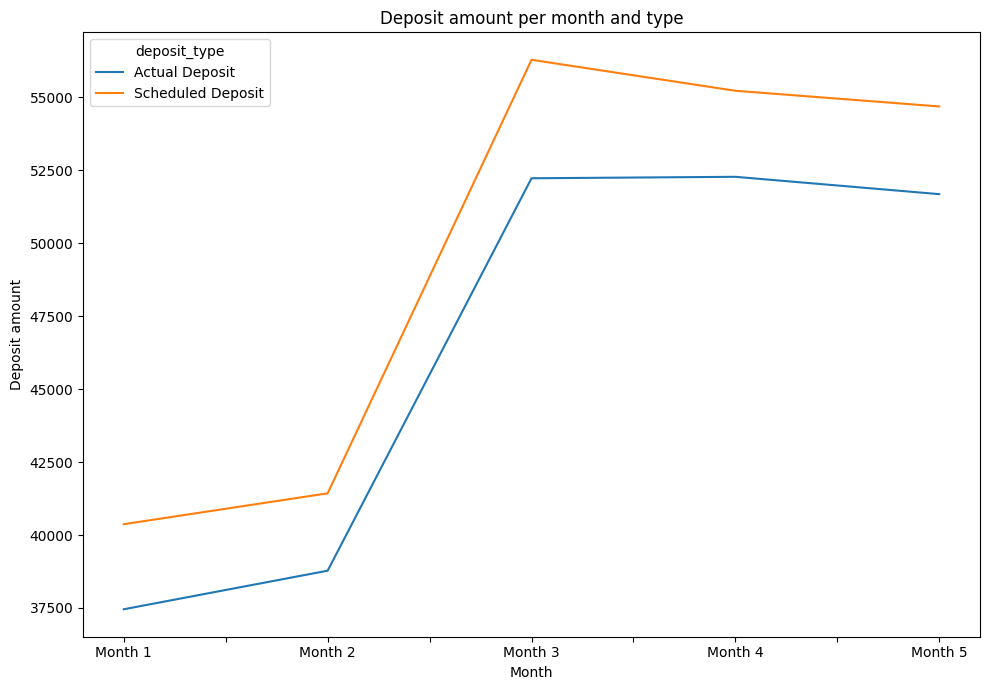

In [50]:
temp_df = merged_data.groupby(by=[merged_data["deposit_type"], merged_data["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

Month 3 is the month where both types reached the peak , but how i would increase the performance based on that , let's see 

In [51]:
def discretize_age(row):
    return int(row.client_age / 25)
#25  = 4 timeframe 
new_dataframe = merged_data.copy(deep=True)
new_dataframe["age_group"] = new_dataframe.apply(discretize_age, axis=1)
new_dataframe

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,3
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5,3
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3,3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3,3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4,3
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4,3
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4,3
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4,3
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5,3


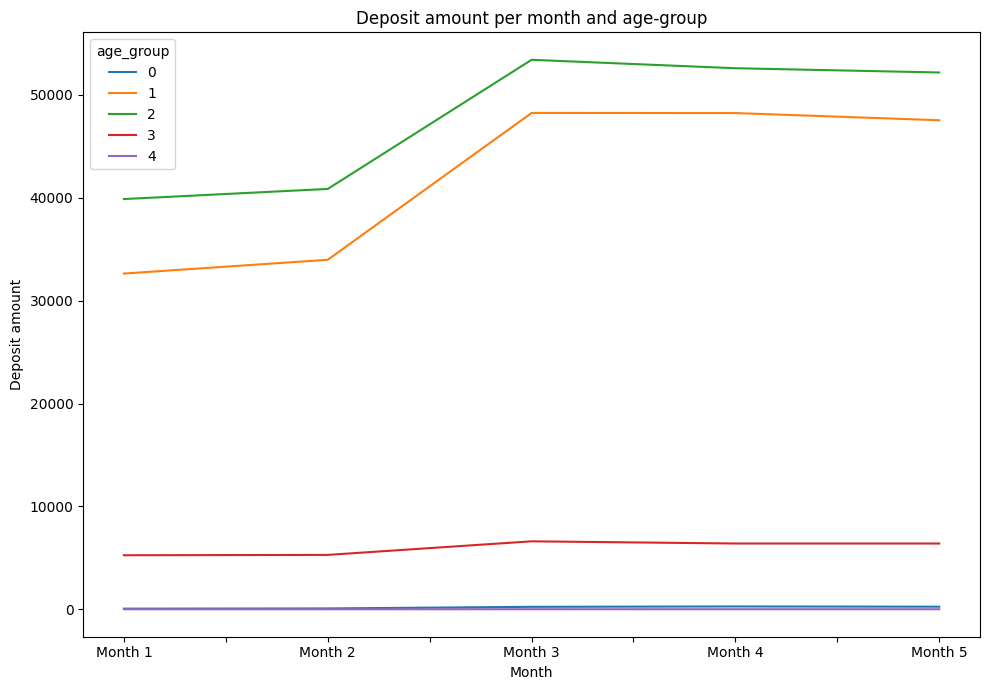

In [52]:
tmp_df = new_dataframe.groupby(by=[new_dataframe["age_group"], new_dataframe["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

<div align="left" style="color: Purple; font-size: 14px; font-weight: bold;">
    What I found:
</div>

The second generation (ages 25 to 50) appears to be stable, while the two older generations' plots show a matchy-matchy flow, with the peak consistently occurring in the third month (March). i see the opportunity in OLD PPL haha

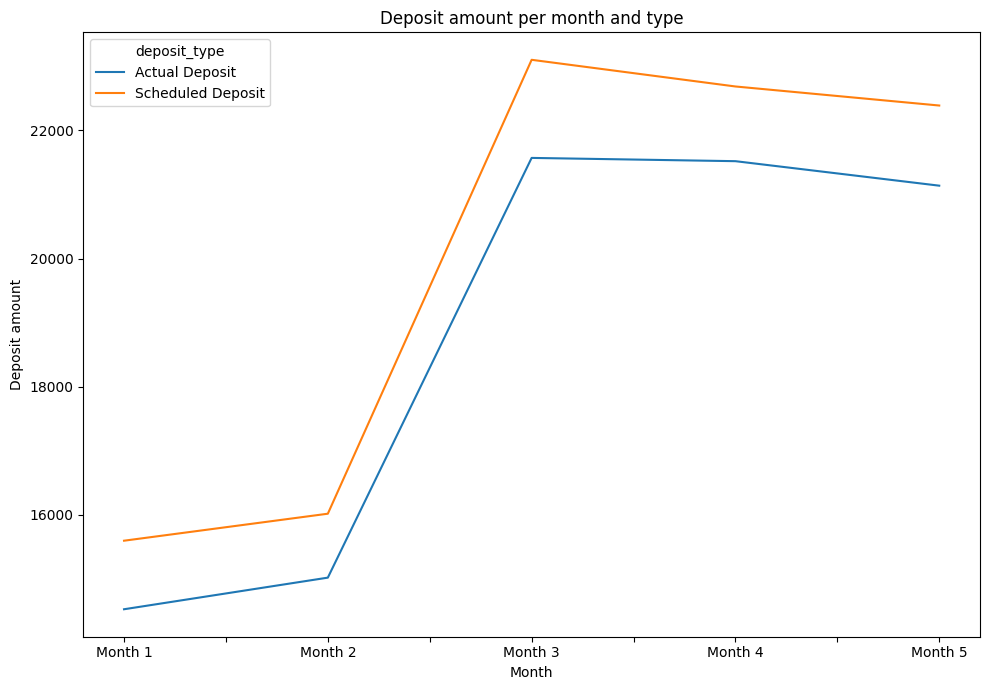

In [53]:
df_q2 = new_dataframe[(new_dataframe["client_residence_status"] == "Own") 
         & (new_dataframe["client_age"] <= 75)
# the a gap of 50 years olds
         & (new_dataframe["client_age"] <= 55 )]
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()


In [70]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = merged_data[merged_data["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
res = extra_deposit_df_q2 / extra_deposit_df
print(f"Results : {res*100:.2f}%")

Results : 44.22%


### When the gap between two groups widens, the deposit amount falls, and the opposite is true. i tried (75 with 25, 75 with 50)

In [72]:
merged_data[merged_data["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

client_geographical_region
West         3570
South        1991
Midwest      1486
Northeast    1300
Name: count, dtype: int64

In [73]:
merged_data[merged_data["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

client_residence_status
Own     5856
Rent    2491
Name: count, dtype: int64

In [74]:
merged_data[merged_data["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()

deposit_type
Actual Deposit    8347
Name: count, dtype: int64

In [75]:
merged_data[merged_data["deposit_cadence"] == "Extra"]["month_name"].value_counts()

month_name
Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: count, dtype: int64

<div align="left" style="color: Purple; font-size: 14px; font-weight: bold;">
    What I found:
</div>

some key points based on the previous cells:

Most extra deposits are observed in the West region as expected. This distribution closely matches the distribution of other deposit types as well
Clients who own their residence are approx. 2.33 times as likely to deposit extra amount than clients who rent their residence
Most extra deposits are observed in Month 3, when the campaign was running. Post-campaign numbers for extra deposits are 33% higher than pre-campaign.
<div align="left" style="color: Red; font-size: 20px; font-weight: bold;">
    QUESTION !  !  !  !
</div>
what will happen if we didn't run the campaign in March ?

In [79]:
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))
df_copy = merged_data.copy(deep=True)

In [78]:
df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

KeyboardInterrupt: 

In [81]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row



In [82]:
df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

KeyboardInterrupt: 

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


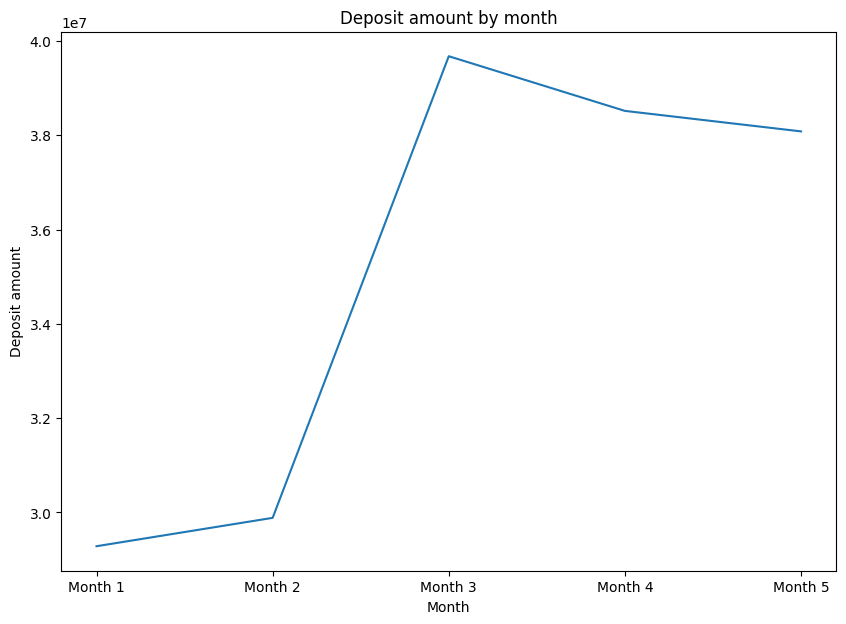

In [83]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

In [84]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()
deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)


_ = plt.plot(deposit_amount_by_month)

_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

KeyError: 'Month 6'

The simulation shows quite an increase in deposits. Following are some key points to summarise the difference from the answer provided in Question 1.

During the month the campaign was running, Freedom Debt Relief received almost $2.5 million increase in deposit amounts than previous months, compared to $10 million in Question 1.

In the month following the campaign, the total deposit amount continues to increase to reach its maximum at $33 million. In the last month, it drops to $31 million but remains on a higher level than pre-campaign.

The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of $8 million. In Question 1 this number was much higher: $26 million, and we determined that that was borderline profitable. So, $8 million is much lower, and we conclude that postponing the campaign would have not been the right choice.